

# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i investigate a dataset called no show appointments.
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.I've debendent variable(No-show) and indebendent vairiables (age,Hipertension,gender,name of the day and sms recived).
My questions will be : 


Is sms received affect for show up ?

Does appointment no-shows occur on specific days of the week?

What is the patient age distribution of no-shows versus shows?


In [74]:
#   plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import seaborn as sn


% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

 I loaded my data 

In [75]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')

In [76]:
# showing the first 5 lines of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
#look at sample of data
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
70809,7.515996e+13,5641648,F,2016-04-29T14:05:06Z,2016-05-04T00:00:00Z,59,SANTA LÚCIA,0,0,0,0,0,1,Yes
52160,3.434837e+13,5707633,M,2016-05-17T09:53:00Z,2016-05-17T00:00:00Z,66,JARDIM CAMBURI,0,1,0,0,0,0,No
49950,7.862818e+12,5669214,F,2016-05-06T10:32:05Z,2016-05-06T00:00:00Z,67,JARDIM DA PENHA,0,0,0,0,0,0,No
98933,2.141638e+14,5753789,F,2016-05-31T14:48:52Z,2016-06-01T00:00:00Z,0,SANTA MARTHA,0,0,0,0,0,0,No
69092,9.529416e+13,5586520,F,2016-04-15T07:42:36Z,2016-05-02T00:00:00Z,54,CARATOÍRA,0,1,0,0,0,0,No


In [78]:
# check number of rows and coulmns
df.shape

(110527, 14)

In [79]:
# get summry of my data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [80]:
# get the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


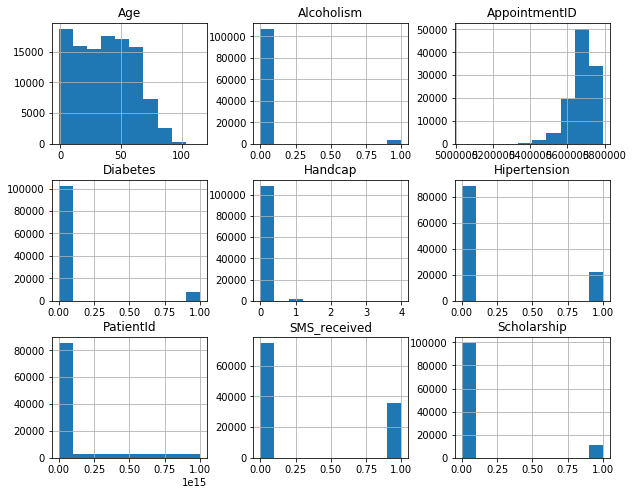

In [81]:
#this histogram data frame
df.hist(figsize=(10,8 ));

In [82]:
#check for null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [83]:
# value counts for scolarship
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [84]:
#unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [85]:

df.AppointmentDay.value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

# Assess


1- Remove Not necessary Columns (PatientId / AppointmentID /Neighbourhood)

2- convert date columns from string to date

3- make new column (ScheduledDay_Name) to know the name of the day

4- calculate waiting time from AppointmentDay  / ScheduledDay

5- drop duplicated rows

6- drop rows in the df_clean['WaitingTime'] less than 0 days

7- Convert No-show column to (1,0) to be more flexible in analysis

 
# Data Cleaning 

## Create a copy of my data frame

In [86]:
df_clean = df.copy()

## Drop unnecessary Coulumns

In [87]:
df_clean = df_clean.drop(columns=['PatientId', 'AppointmentID','Neighbourhood'])

## Check for columns

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


## convert ScheduledDay , AppointmentDay  Coulmns to datetime to can handle with it 

In [89]:
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])

In [90]:
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

## Check for date types

In [91]:
df_clean.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

## know the name of ScheduledDay

In [92]:
df_clean['ScheduledDay_Name'] = df_clean['ScheduledDay'].dt.day_name()

## Check for ScheduledDay_Name coulmn

In [93]:
df_clean['ScheduledDay_Name'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: ScheduledDay_Name, dtype: int64

In [94]:
# get the value counts for Handcap
df_clean.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

## get the number of duplicated

In [95]:
df_clean.duplicated().sum()

722

## drop duplicates 

In [96]:
df_clean.drop_duplicates(inplace = True)

In [97]:
df_clean['AppointmentDay'] = df_clean['AppointmentDay'].dt.date

In [98]:
df_clean['ScheduledDay'].sample(5)

45168   2016-04-27 15:44:00
31525   2016-04-12 08:28:30
12184   2016-05-03 11:45:23
38601   2016-05-04 16:31:32
73801   2016-05-06 13:38:06
Name: ScheduledDay, dtype: datetime64[ns]

## Get waiting time

In [99]:
df_clean['ScheduledDay'] = df_clean['ScheduledDay'].dt.date

In [100]:
df_clean['WaitingTime'] = df_clean['AppointmentDay'] - df_clean['ScheduledDay']

In [101]:
df_clean['WaitingTime']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
5         2 days
6         2 days
7         2 days
8         0 days
9         2 days
10        2 days
11        3 days
12        1 days
13        1 days
14        1 days
15        3 days
16        1 days
17        1 days
18        3 days
19        0 days
20        2 days
21        2 days
22        4 days
23        1 days
24        0 days
25        3 days
26        0 days
27        2 days
28        0 days
29        0 days
           ...  
110497    0 days
110498    0 days
110499    0 days
110500    0 days
110501    0 days
110502    0 days
110503    0 days
110504    0 days
110505    0 days
110506    0 days
110507    0 days
110508    0 days
110509    0 days
110510    0 days
110511    0 days
110512    0 days
110513    0 days
110514    0 days
110515    2 days
110516    1 days
110517    0 days
110518   41 days
110519   41 days
110520   35 days
110521   35 days
110522   35 days
110523   35 days
110524   41 da

In [102]:
zero_waiting = df_clean.loc[(df_clean.WaitingTime == "0 days")]

In [103]:
zero_waiting['WaitingTime'].value_counts()

0 days    38398
Name: WaitingTime, dtype: int64

## Waiting Time less than zero check it because it's erroneous

In [104]:
newdf = df_clean.loc[(df_clean.WaitingTime < "0 days")]

In [105]:
newdf['WaitingTime'].value_counts()

-1 days    4
-6 days    1
Name: WaitingTime, dtype: int64

In [106]:
df_clean.dtypes

Gender                        object
ScheduledDay                  object
AppointmentDay                object
Age                            int64
Scholarship                    int64
Hipertension                   int64
Diabetes                       int64
Alcoholism                     int64
Handcap                        int64
SMS_received                   int64
No-show                       object
ScheduledDay_Name             object
WaitingTime          timedelta64[ns]
dtype: object

In [107]:
df_clean.groupby('ScheduledDay_Name')['No-show'].value_counts()

ScheduledDay_Name  No-show
Friday             No         14945
                   Yes         3809
Monday             No         18440
                   Yes         4509
Saturday           No            22
                   Yes            1
Thursday           No         14289
                   Yes         3649
Tuesday            No         20783
                   Yes         5247
Wednesday          No         19275
                   Yes         4836
Name: No-show, dtype: int64

## Age less than zero check it because it's erroneous


In [108]:
age_df = df_clean.loc[(df_clean.Age < 0)]

In [109]:
age_df['Age'].value_counts()

-1    1
Name: Age, dtype: int64

## Replace No-show values with 1 , 0

In [110]:
df_clean['No-show'] = df_clean['No-show'].replace(['Yes'],1)


In [111]:
df_clean['No-show'] = df_clean['No-show'].replace(['No'],0)



In [112]:
df_clean['No-show'].value_counts()

0    87754
1    22051
Name: No-show, dtype: int64

In [113]:
df_clean['No-show'].dtype

dtype('int64')

<a id='eda'></a>
# Exploratory Data Analysis

>


# What are the impotant factors which affects a patient showing up for their scheduled appointment?¶


In [114]:
#Create Masks for rows with No-show 
Absent = df_clean['No-show'] == True
Show = df_clean['No-show'] == False

In [115]:
Show.value_counts()

True     87754
False    22051
Name: No-show, dtype: int64

In [116]:
Absent.value_counts()

False    87754
True     22051
Name: No-show, dtype: int64

In [117]:
df_clean['No-show'].value_counts()

0    87754
1    22051
Name: No-show, dtype: int64

### Does the  ScheduledDay_Name affects a patient showing up for their scheduled appointment?
## i'll explore which day have most trafic and one have the least interacted with .


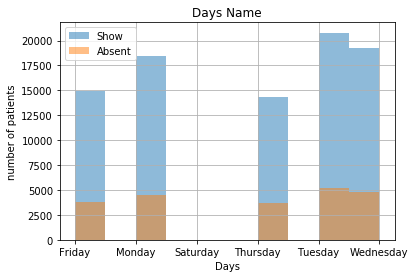

In [118]:
df_clean.ScheduledDay_Name[Show].hist(alpha=.5,label='Show')
df_clean.ScheduledDay_Name[Absent].hist(alpha=.5,label='Absent')
plt.xlabel('Days')
plt.ylabel('number of patients')
plt.title('Days Name')
plt.legend();



In [119]:
df_clean.groupby('ScheduledDay_Name')['No-show'].value_counts()

ScheduledDay_Name  No-show
Friday             0          14945
                   1           3809
Monday             0          18440
                   1           4509
Saturday           0             22
                   1              1
Thursday           0          14289
                   1           3649
Tuesday            0          20783
                   1           5247
Wednesday          0          19275
                   1           4836
Name: No-show, dtype: int64

## Does appointment no-shows occur on specific days of the week? Appointment no-shows occurred the most on Tuesdays(20783 show and 5247 No-Show) and the least on Thursdays(14289 show  and 3649 No show) i think Saturday is outliar because it's out of range . Overall, appointments early in the week have a higher no-show rate. It's difficult to draw any conclusions from this .

### What is the patient age distribution of no-shows versus shows?

In [120]:
df_clean.Age[Show].mean()

37.805672675889419

In [121]:
df_clean.Age[Absent].mean()

34.31762731848896

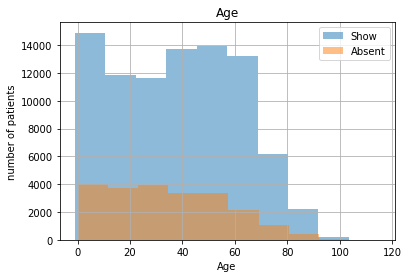

In [122]:
df_clean.Age[Show].hist(alpha=.5,label='Show')
df_clean.Age[Absent].hist(alpha=.5,label='Absent')
plt.xlabel('Age')
plt.ylabel('number of patients')
plt.title('Age')
plt.legend();


## What is the patient age distribution of no-shows versus shows? Patient age was charted to see if there was a large difference between the no-shows and shows segments. The mean age of the no-shows segment was 34 compared to the shows segment which was 38. No significant differences to note.

## is there any relation between gender and No show?
## Or just one of the genders go to doctore more another


In [123]:
df_clean.groupby('Gender')['No-show'].count()

Gender
F    71389
M    38416
Name: No-show, dtype: int64

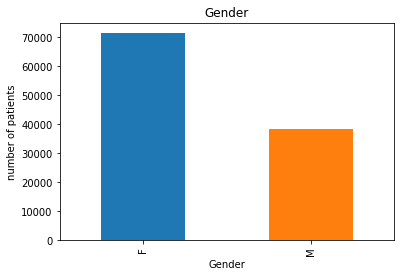

In [124]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_clean.groupby('Gender')['No-show'].count().plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('number of patients')
plt.title('Gender');

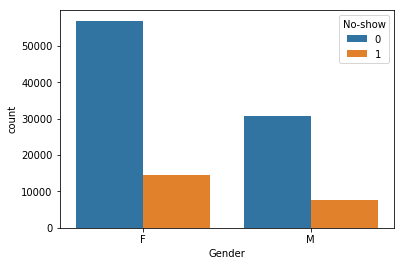

In [125]:
sns.countplot(x='Gender', hue='No-show', data=df_clean);


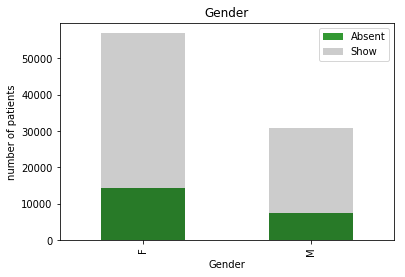

In [126]:
df_clean.Gender[Absent].value_counts().plot(kind='bar',alpha=.8,color='green',label='Absent')
df_clean.Gender[Show].value_counts().plot(kind='bar',alpha=.2,color='black',label='Show')

plt.xlabel('Gender')
plt.ylabel('number of patients')
plt.title('Gender')
plt.legend();

## is there any relation between gender and No show?
## Or just one of the genders shedule day to doctore more another?
## Yes females are more than males we see females there 71389 compare than 38416 for male it's big difference .If we had taken into account when taking the sample pregnant women and the health problems related to that, they would have been accurately expressed.

### Does the  Hipertension affects a patient showing up for their scheduled appointment?



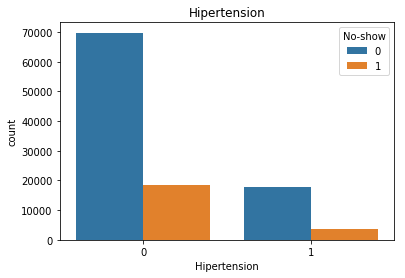

In [127]:
sns.countplot(x='Hipertension', hue='No-show', data=df_clean);
plt.title('Hipertension');



## is sms received affect for show up  and how many people recived massege?


In [128]:
df_clean.groupby('SMS_received')['No-show'].count()
df_clean.groupby('SMS_received')['No-show'].count()

SMS_received
0    74325
1    35480
Name: No-show, dtype: int64

In [129]:
df_clean.groupby('SMS_received')['No-show'].value_counts()
df_clean.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             0          62056
              1          12269
1             0          25698
              1           9782
Name: No-show, dtype: int64

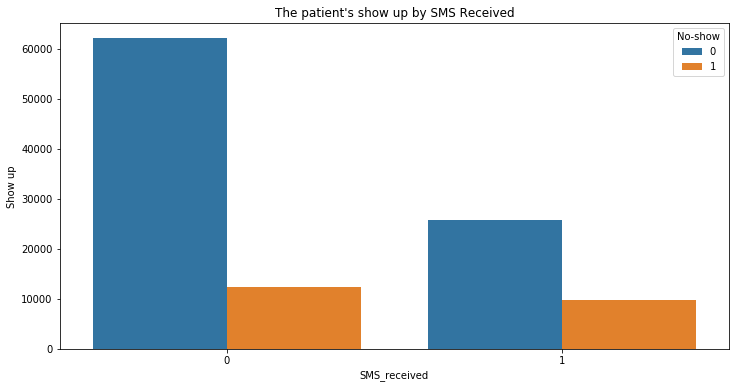

In [130]:
plt.figure(figsize=(12,6))
sn.countplot(x=df_clean['SMS_received'], hue=df_clean['No-show'], data=df_clean)
plt.title("The patient's show up by SMS Received")
plt.ylabel('Show up');

## is sms received affect for show up ?
## yes people who recived shows more comparison to another because that help them to rember their sceddule . we have 74325 paints are n't recived sms and 35480 recieved sms. who didn't recieve message there're 12269 n't show ,and who recevied message and n't come 9782 .


<a id='conclusions'></a>
## Conclusions

Nearly 80% of all appointments investigated were no-shows. This number was the root driver of the analysis. The following conclusions were drawn to serve as a basis for a more robust analysis in the future.

## Findings:


is sms received affect for show up ?
yes people who recived shows more comparison to another

does appointment no-shows occur on specific days of the week?
Appointment no-shows occurred the most on Tuesdays and the least on Thursdays. Overall, appointments early in the week have a higher no-show rate. It's difficult to draw any conclusions from this .

What is the patient age distribution of no-shows versus shows?
Patient age was charted to see if there was a large difference between the no-shows and shows segments. The mean age of the no-shows segment was 34 compared to the shows segment which was 38. No significant differences to note.

## limitations
In waitting time there are some erroneous (-1 days:4 times) ,(-6 days: 1 time ) that is not possiple to waiting time to be negative .

In Age also there are some erroneous (-1 days:1 times)  that is not possiple to age to be negative .




In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0